In [1]:
import sys
sys.path.append('../..')

import colorsys
import pandas as pd
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from matplotlib import colors
from colour import Color
import matplotlib.pyplot as plt
import numpy as np
import cv2
import requests
from src.crud.media.image import image
from src.database.session import SessionLocal
from src.image_analysis.utils import *
from tqdm import tqdm
db = SessionLocal()

ModuleNotFoundError: No module named 'colour'

In [2]:
urls = image.get_random_urls(db=db)
urls = urls[:10]

images = []
for url in tqdm(urls):
    try:
        image = download_image(img_url=url)
        if image is not None:
            images.append(image)
    except Exception:
        pass
len(images)

100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


6

In [3]:
images[0].shape

(420, 420, 3)

In [4]:
all_colours = {}
N_CLUSTERS = 5
NUMBER_OF_PIXELS = 5000

for img in tqdm(images):
    color_distribution = color_analysis(img=img, n_clusters=N_CLUSTERS, number_of_pixels=NUMBER_OF_PIXELS)
    all_colours = {k: all_colours.get(k, 0)+color_distribution.get(k, 0) for k in set(all_colours)|set(color_distribution)}

len(all_colours)

  0%|          | 0/6 [00:00<?, ?it/s]/Users/sanjinjuricfot/developer/premium_dashboard/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 17%|█▋        | 1/6 [00:02<00:11,  2.36s/it]/Users/sanjinjuricfot/developer/premium_dashboard/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 33%|███▎      | 2/6 [00:03<00:07,  1.82s/it]/Users/sanjinjuricfot/developer/premium_dashboard/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 50%|█████     | 3/6 [00:04<00:03,  1.28s/

30

/Users/sanjinjuricfot/developer/premium_dashboard/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


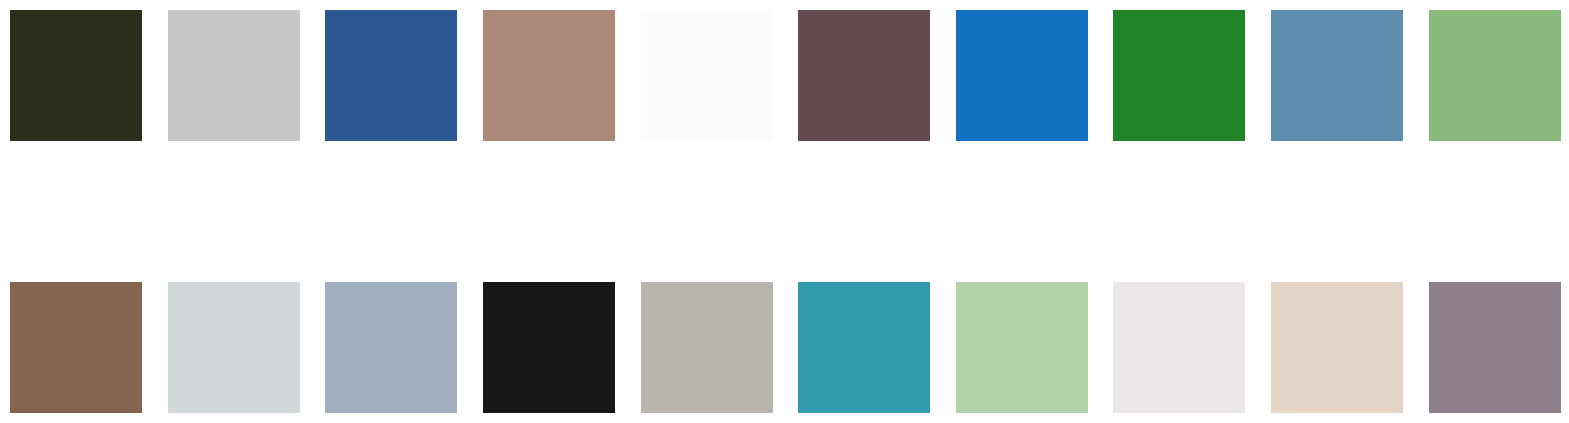

In [5]:
df = pd.DataFrame(pd.Series(all_colours), columns=['freq'])
df.index.names = ['r', 'b', 'g']
df.reset_index(inplace=True)
X = df[['r', 'b', 'g']]
y = df['freq']
clf = KMeans(n_clusters=20)
color_labels = clf.fit_predict(X, sample_weight=y)
basic_colors = clf.cluster_centers_
plot_color_palette(rgbs=basic_colors)

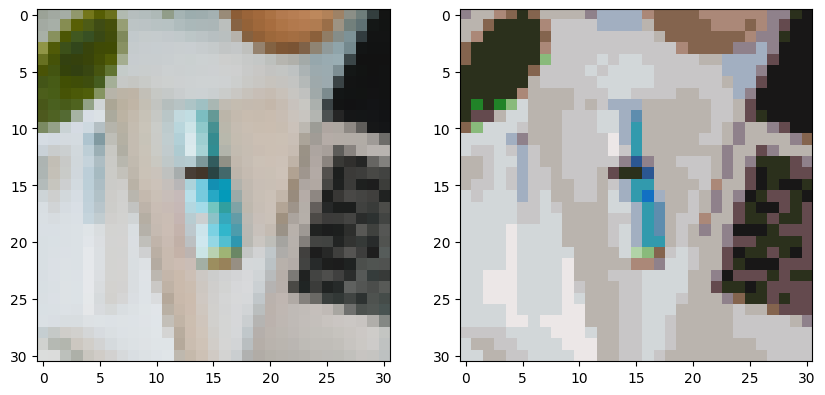

In [6]:
img = images[1]
nn = train_nn_on_basic_colors(basic_colors=basic_colors)
new = get_basic_color_image(img=img, number_of_pixels=1000, nn=nn)

In [9]:
cv2.imwrite('img.jpg', new)

True